In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['figure.dpi'] = 300 

# Question 1

The value of θ that satisfies the equation is approximately 0.739085 radians or 42.346460 degrees.
The ground state energy of an electron in a finite square well potential with height 5 eV and width 200 pm is approximately 9.400754 eV.


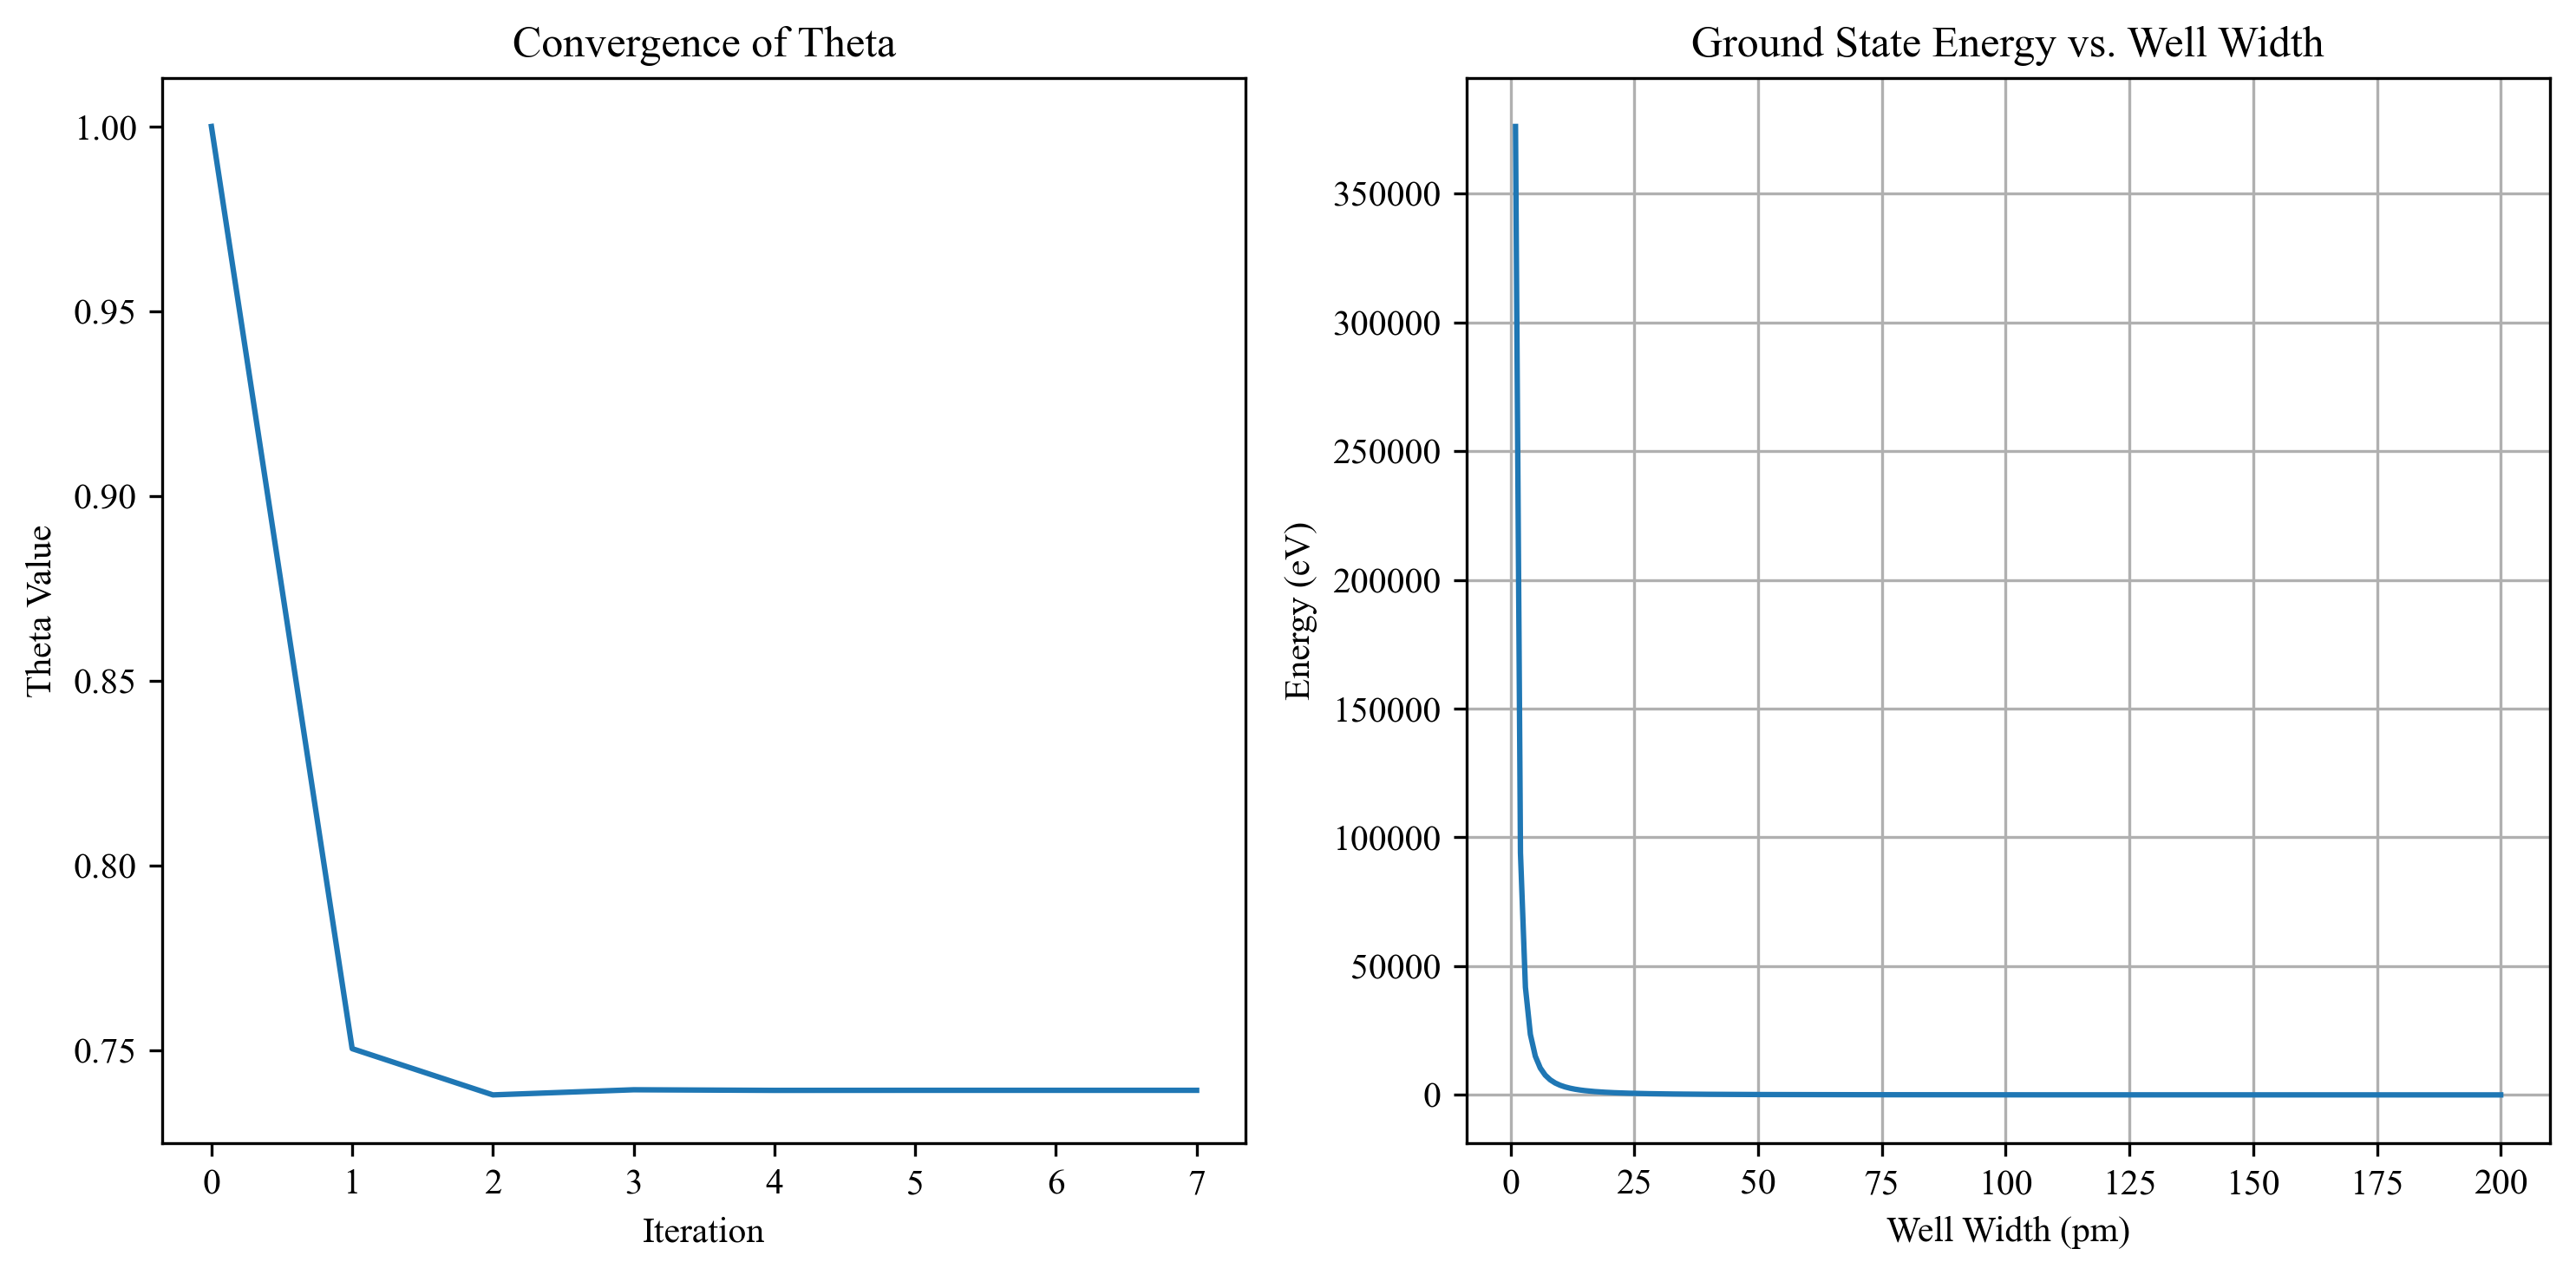

In [2]:
# Defining the iterative method
def iterative_method(a, initial_guess, tolerance):
    theta = initial_guess
    thetas = [theta]  # Store theta values for plotting
    while True:
        sec_theta = 1 / np.cos(theta)
        theta_new = theta - (theta * sec_theta - a) / (sec_theta + theta * np.tan(theta))  # Newton-Raphson method
        thetas.append(theta_new)
        if abs(theta_new - theta) < tolerance:
            return theta_new, thetas
        theta = theta_new

# Defining the finite square well energy calculation
def finite_square_well_energy(height, width):
    m = 9.10938356e-31  # mass of electron in kg
    h_bar = 1.0545718e-34  # reduced Planck constant in J s
    n = 1  # quantum number for ground state
    L = width * 1e-12  # width of well in m
    E_n = (n ** 2 * np.pi ** 2 * h_bar ** 2) / (2 * m * L ** 2)
    E_n_ev = E_n / 1.602176634e-19  # convert to eV
    return E_n_ev

# Parameters
a = 1
initial_guess = 1
tolerance = 1e-6

# Performing the iterative method
theta, theta_values = iterative_method(a, initial_guess, tolerance)

# Parameters for plotting
height = 5
width = 200
widths = np.linspace(1, 200, 200)  # Vary the width
energy = finite_square_well_energy(height, width)

# Calculating energies for different widths
energies = [finite_square_well_energy(height, width) for width in widths]

print(f"The value of θ that satisfies the equation is approximately {theta:.6f} radians or {np.degrees(theta):.6f} degrees.")
print(f"The ground state energy of an electron in a finite square well potential with height {height} eV and width {width} pm is approximately {energy:.6f} eV.")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(theta_values)
plt.xlabel("Iteration")
plt.ylabel("Theta Value")
plt.title("Convergence of Theta")

plt.subplot(1, 2, 2)
plt.plot(widths, energies)
plt.xlabel("Well Width (pm)")
plt.ylabel("Energy (eV)")
plt.title("Ground State Energy vs. Well Width")
plt.grid(True)

plt.tight_layout()
plt.show()


# Question 2.a

First we write code for solving the equation using the Newton-Raphson method

In [4]:
# Defining the function and its derivative
def f(x):
    return x**4 - 3*x**2 - 2

def dfdx(x):
    return 4*x**3 - 6*x

# Newton-Raphson method
def newton_raphson(f, dfdx, x0, n):
    x = x0
    for i in range(n):
        x = x - f(x) / dfdx(x)
    return x

x0 = 1 #initial guess
n = 3 #number of iterations
root = newton_raphson(f, dfdx, x0, n)
print(f"The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately {root:.6f} after {n} iterations.")

The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately -1.000000 after 3 iterations.


But, we need to check if the value of the root actually converges after just 3 iterations. We also need to check if it gives us the correct root. We also plot the function to visually understand how good our intitial guess is, so we modify the code as follows, we also write the code in another way and verify from the plot:

In [5]:
# Defining the function and its derivative
def f(x):
    return x**4 - 3*x**2 - 2

def dfdx(x):
    return 4*x**3 - 6*x

# Newton-Raphson method 
def newton_raphson(f, dfdx, x0, tol=1e-6, max_iter=3):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / dfdx(x)
        absolute_error = abs(x_new - x)
        
        if absolute_error < tol:
            return x_new, absolute_error, i + 1 
        
        x = x_new

    raise ValueError("Newton-Raphson did not converge within the specified number of iterations.")

x0 = 1  # Initial guess
tolerance = 1e-6

root, error, iterations = newton_raphson(f, dfdx, x0, tol=tolerance)

print(f"The root of the equation is approximately {root:.6f} after {iterations} iterations.")
print(f"Estimated absolute error: {error:.6e}")

ValueError: Newton-Raphson did not converge within the specified number of iterations.

Iteration 0: x = 1.000000, f(x) = -4.000000
Iteration 1: x = -1.000000, f(x) = -4.000000
Iteration 2: x = 1.000000, f(x) = -4.000000
Iteration 3: x = -1.000000, f(x) = -4.000000


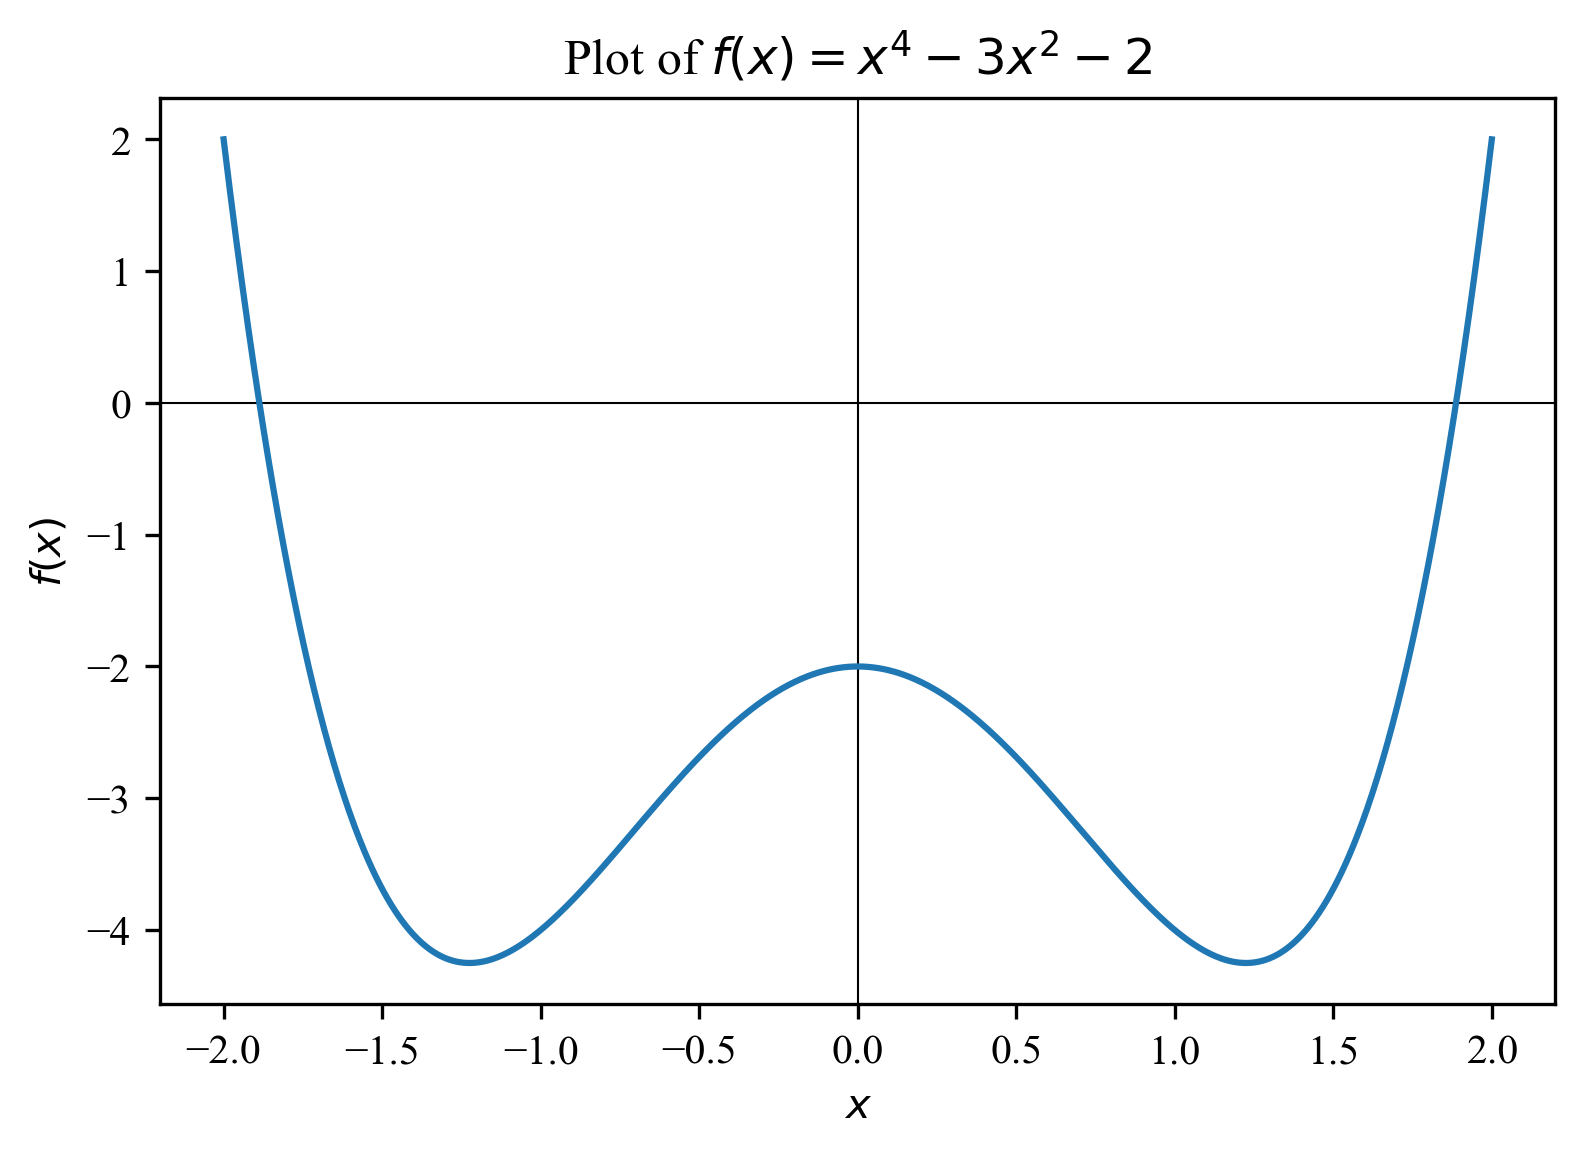

In [6]:
# Defining the function and its derivative
def f(x):
    return x**4 - 3*x**2 - 2

def df(x):
    return 4*x**3 - 6*x

# Newton-Raphson method
def newton_raphson_iteration(x, f, df):
    return x - f(x) / df(x)

# Initial guess
x_initial = 1.0

# Performing three iterations
x_values = [x_initial]
for i in range(3):
    x_new = newton_raphson_iteration(x_values[-1], f, df)
    x_values.append(x_new)

# Printing the iterations
for i, x in enumerate(x_values):
    print(f"Iteration {i}: x = {x:.6f}, f(x) = {f(x):.6f}")

#Plotting the fucntion

x = np.linspace(-2, 2, 1000)
y = f(x)

plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x) = x^4 - 3x^2 - 2$')
plt.show()

The Newton-Raphson method can fail to converge if the initial guess is too far from the root or if there are multiple roots close together. The first three iterations of the Newton-Raphson method for the function $f(x) = x^4 - 3x^2 - 2$ starting from $x = 1$ are: 

Iteration 0: $x = 1.0$, $f(x) = -4.0$ 

Iteration 1: $x = -1.0$, $f(x) = -4.0$  

Iteration 2: $x = 1.0$, $f(x) = -4.0$ 

Iteration 3: $x = -1.0$, $f(x) = -4.0$ 

As we can see, the method is not converging and is oscillating between two values. This is because the initial guess is too far from the root and the derivative of the function is zero at that point. This would also mean that having more iterations is also not going to help us converge us to the correct answer. 

The actual roots of the polynomial $f(x)$ are:
  
$x_1 = 1.8872$

$x_2 = −1.8872$

$x_3 = 0.7494i$

$x_4 = −0.7494i$


# Question 2.b

Iteration 0: x = 0.100000, f(x) = 10.000000
Iteration 1: x = 0.200000, f(x) = 5.000000
Iteration 2: x = 0.400000, f(x) = 2.500000
Iteration 3: x = 0.800000, f(x) = 1.250000
Iteration 4: x = 1.600000, f(x) = 0.625000
Iteration 5: x = 3.200000, f(x) = 0.312500
Iteration 6: x = 6.400000, f(x) = 0.156250
Iteration 7: x = 12.800000, f(x) = 0.078125
Iteration 8: x = 25.600000, f(x) = 0.039062
Iteration 9: x = 51.200000, f(x) = 0.019531
Iteration 10: x = 102.400000, f(x) = 0.009766


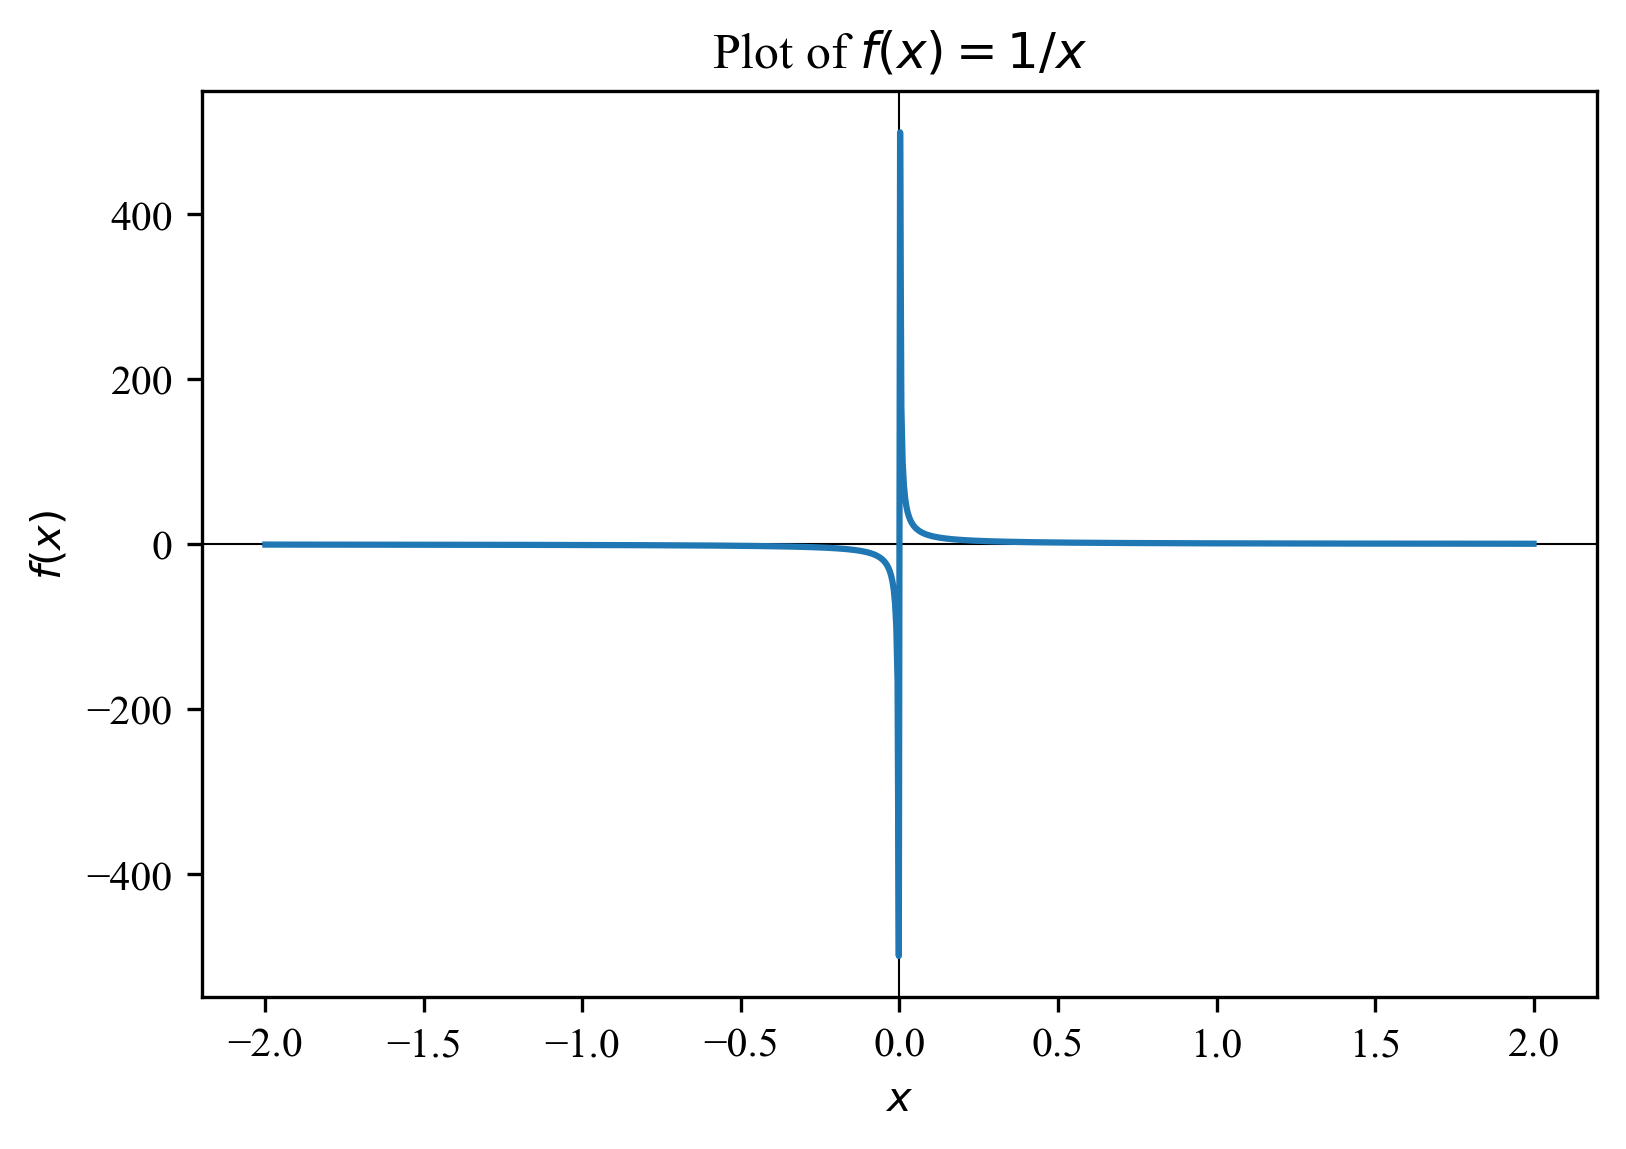

In [7]:
# Defining the new function and its derivative
def f_slow(x):
    return 1 / x

def df_slow(x):
    return -1 / x**2

# Performing iterations with an initial guess near zero
x_initial_slow = 0.1  # Initial guess near zero

x_values_slow = [x_initial_slow]
for i in range(10):
    x_new_slow = newton_raphson_iteration(x_values_slow[-1], f_slow, df_slow)
    x_values_slow.append(x_new_slow)

# Printing the iterations
for i, x in enumerate(x_values_slow):
    print(f"Iteration {i}: x = {x:.6f}, f(x) = {f_slow(x):.6f}")
    
# Plotting the graph
x = np.linspace(-2, 2, 1000)
y = f_slow(x)

plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x) = 1/x$')
plt.show()


In this example, the roots are not converging, instead they are diverging

Iteration 0: x = -0.100000, f(x) = 2.199000
Iteration 1: x = 1.016244, f(x) = 1.017040
Iteration 2: x = 0.090192, f(x) = 1.820350
Iteration 3: x = 1.011610, f(x) = 1.012016
Iteration 4: x = 0.065857, f(x) = 1.868572
Iteration 5: x = 1.006261, f(x) = 1.006379
Iteration 6: x = 0.036428, f(x) = 1.927193
Iteration 7: x = 1.001946, f(x) = 1.001957
Iteration 8: x = 0.011564, f(x) = 1.976874
Iteration 9: x = 1.000199, f(x) = 1.000199
Iteration 10: x = 0.001193, f(x) = 1.997614


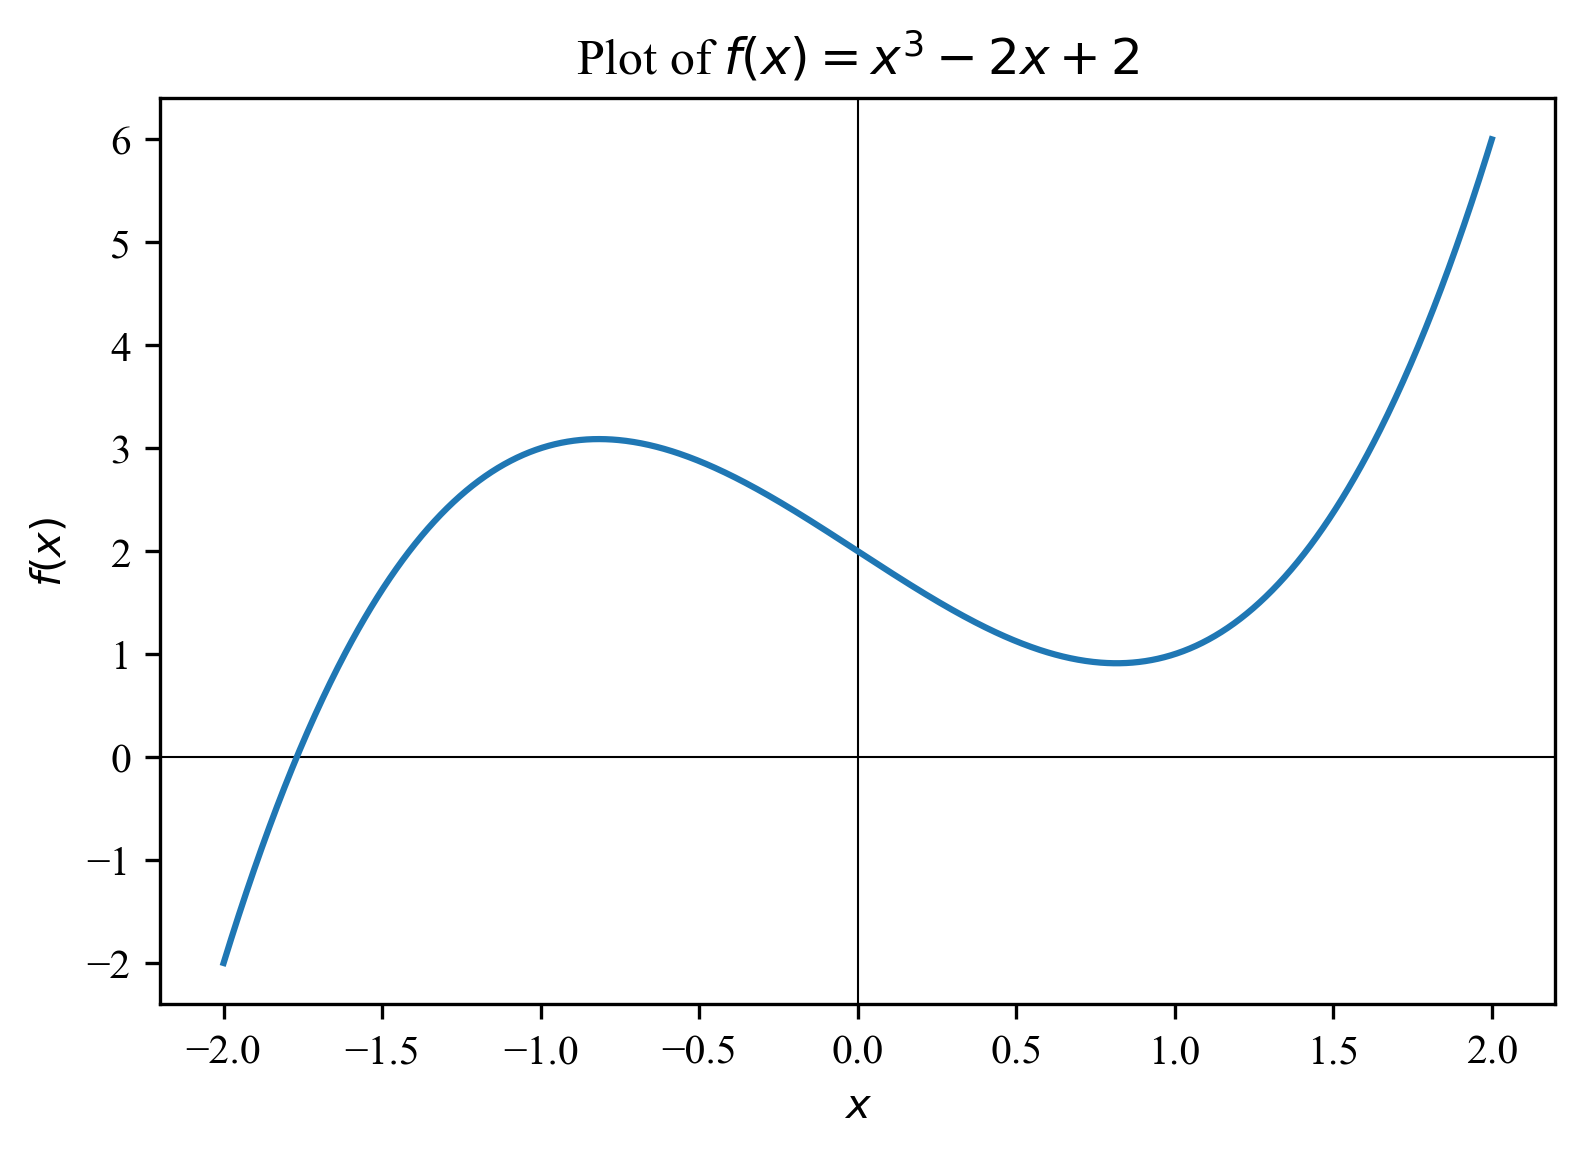

In [8]:
# Defining the new function and its derivative
def f_slow(x):
    return x**3 - 2*x + 2

def df_slow(x):
    return 3*x**2 - 2

# Performing three iterations with an initial guess near zero
x_initial_slow = -0.1 # Initial guess near zero

x_values_slow = [x_initial_slow]
num_iter = 10 #number of iterations
for i in range(num_iter):
    x_new_slow = newton_raphson_iteration(x_values_slow[-1], f_slow, df_slow)
    x_values_slow.append(x_new_slow)

# Printing the iterations
for i, x in enumerate(x_values_slow):
    print(f"Iteration {i}: x = {x:.6f}, f(x) = {f_slow(x):.6f}")
    
x = np.linspace(-2, 2, 1000)
y = f_slow(x)

plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x) = x^3 - 2x + 2$')
plt.show()

In this example, the roots are oscillating between values but are not converging. The values eventually oscillate between 0 and 1

Iteration 0: x = 1.000000, f(x) = 1.000000
Iteration 1: x = 2.000000, f(x) = 2.000000
Iteration 2: x = 1.500000, f(x) = 0.875000
Iteration 3: x = 0.333333, f(x) = 1.814815
Iteration 4: x = 2.148148, f(x) = 2.683636
Iteration 5: x = 1.637080, f(x) = 1.027363
Iteration 6: x = 0.948393, f(x) = 1.054133
Iteration 7: x = 1.910874, f(x) = 1.674562
Iteration 8: x = 1.405090, f(x) = 0.825482
Iteration 9: x = -1.324018, f(x) = -3.827083
Iteration 10: x = -0.961438, f(x) = -0.737445
Iteration 11: x = -0.850022, f(x) = -0.059248
Iteration 12: x = -0.839381, f(x) = -0.000514
Iteration 13: x = -0.839287, f(x) = -0.000000
Iteration 14: x = -0.839287, f(x) = 0.000000
Iteration 15: x = -0.839287, f(x) = 0.000000


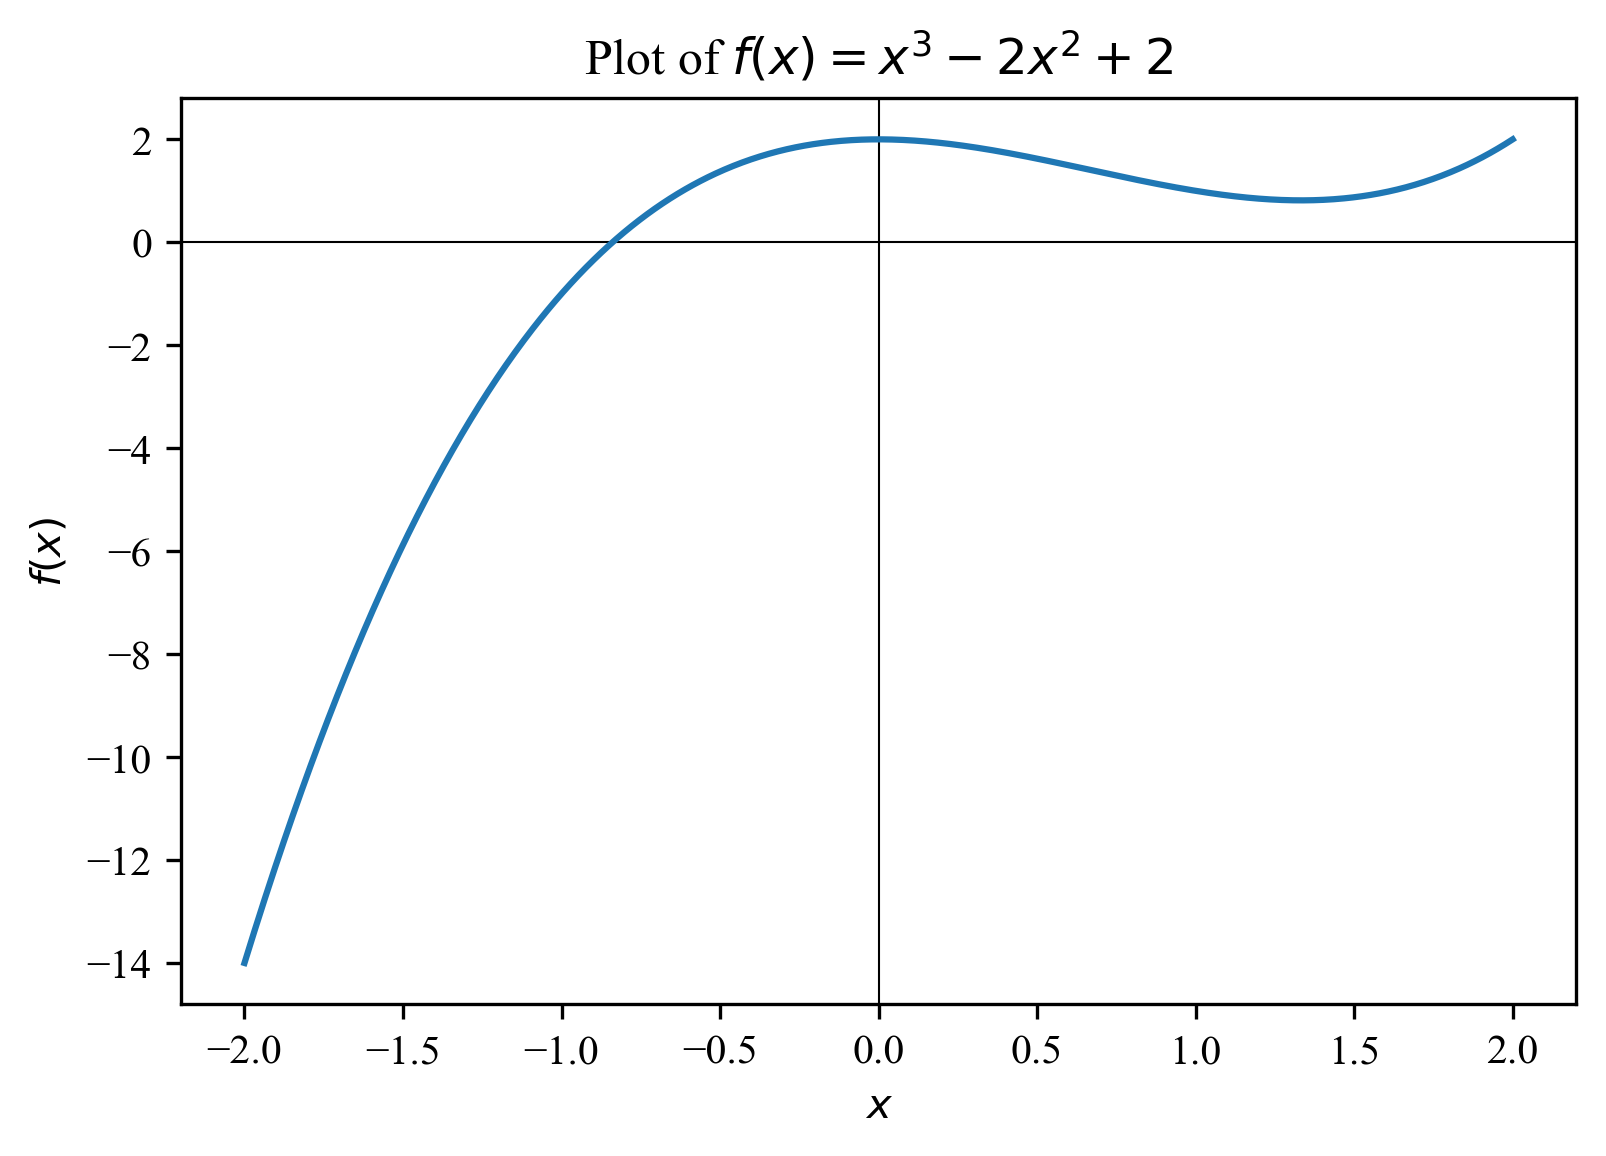

In [9]:
# Defining the new function and its derivative
def f_slow(x):
    return x**3 - 2*x**2 + 2

def df_slow(x):
    return 3*x**2 - 4*x

# Performing three iterations with an initial guess near zero
x_initial_slow = 1 # Initial guess near zero

x_values_slow = [x_initial_slow]
num_iter = 15 #number of iterations
for i in range(num_iter):
    x_new_slow = newton_raphson_iteration(x_values_slow[-1], f_slow, df_slow)
    x_values_slow.append(x_new_slow)

# Printing the iterations
for i, x in enumerate(x_values_slow):
    print(f"Iteration {i}: x = {x:.6f}, f(x) = {f_slow(x):.6f}")
    
x = np.linspace(-2, 2, 1000)
y = f_slow(x)

plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x) = x^3 - 2x^2 + 2$')
plt.show()

In this case, the value of the root of the function converges slowly

# Question 3.a

We want the positive root of the equation $x^2 − 4xsinx + (2 sin x)^2$. The bisection method and the Newton-Raphson method are two numerical methods that can be used to solve this equation.

The bisection method is a simple and robust method for finding roots of equations. It works by repeatedly dividing an interval in half and checking which half contains the root. The method is guaranteed to converge to a root if the function is continuous and changes sign over the interval. However, the convergence rate of the bisection method is slow, and it can take many iterations to achieve a desired level of accuracy.

The Newton-Raphson method is a faster method for finding roots of equations. It works by making an initial guess for the root and then using the derivative of the function to refine the guess until a desired level of accuracy is achieved. The method can converge very quickly if the initial guess is close to the root, but it can fail to converge or converge slowly if the initial guess is too far from the root or if there are multiple roots close together.

In [10]:
# Defining the function
def f(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

# Bisection method to find the root within the specified interval [a, b]
def bisection_method(a, b, f, tol=1e-6, max_iterations=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method requires the function to change sign over the interval.")

    error_estimate = np.inf
    x_root = None
    iterations = 0

    while error_estimate > tol and iterations < max_iterations:
        c = (a + b) / 2
        error_estimate = np.abs(b - a) / 2
        if f(c) == 0:
            x_root = c
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iterations += 1

    if x_root is None:
        x_root = (a + b) / 2

    return x_root, error_estimate, iterations

# Given interval [a, b] where the function changes sign
a = 1.0
b = 3.0  # Adjusted to make the function change sign

# Finding the root using the bisection method
root_bisection, error_estimate_bisection, iterations_bisection = bisection_method(a, b, f)

# Printing the root and error estimate using the bisection method
print("Root using Bisection Method:", root_bisection)
print("Error Estimate using Bisection Method:", error_estimate_bisection)
print("Number of Iterations using Bisection Method:", iterations_bisection)

ValueError: Bisection method requires the function to change sign over the interval.

As the function does not change sign over the interval, we need to modify the function to use the bisection method here

# Question 3.b

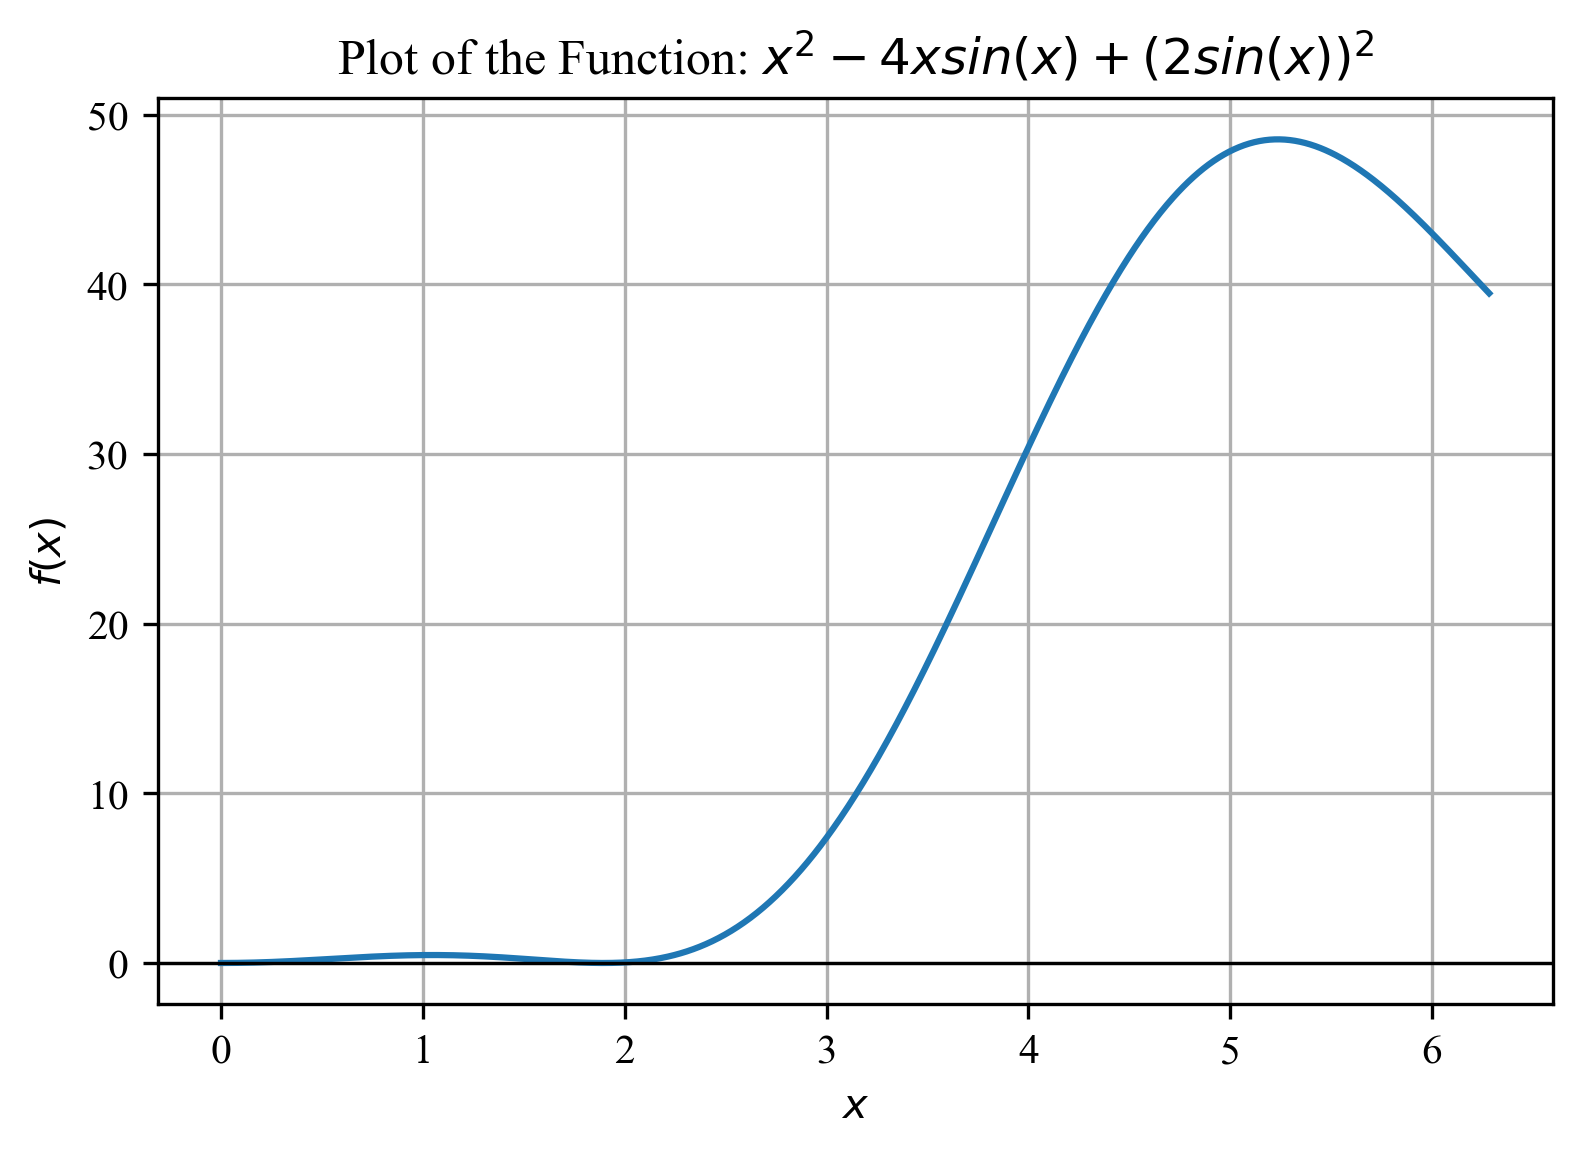

In [11]:
# Defining the function
def f(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

# Generating x values
x_values = np.linspace(0, 2 * np.pi, 1000)

# Computing function values
y_values = f(x_values)

# Plotting the function

plt.plot(x_values, y_values)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Plot of the Function: $x^2 - 4xsin(x) + {(2sin(x))}^2$')
plt.grid()
plt.show()

Graphically also we can see that the the function does not change sign in any interval but the function $x^2 - 4xsin(x) + {(2sin(x))}^2$ can be re-written as $(x-2sinx)^2$. As the two equations are equivalent, the root obtained from the modified equation (if we can find one) would also be the root of the original equation. As we want a positive root, solving for $(x-2sinx)^2 = 0$ and $(x-2sinx) =0$ would be the same.

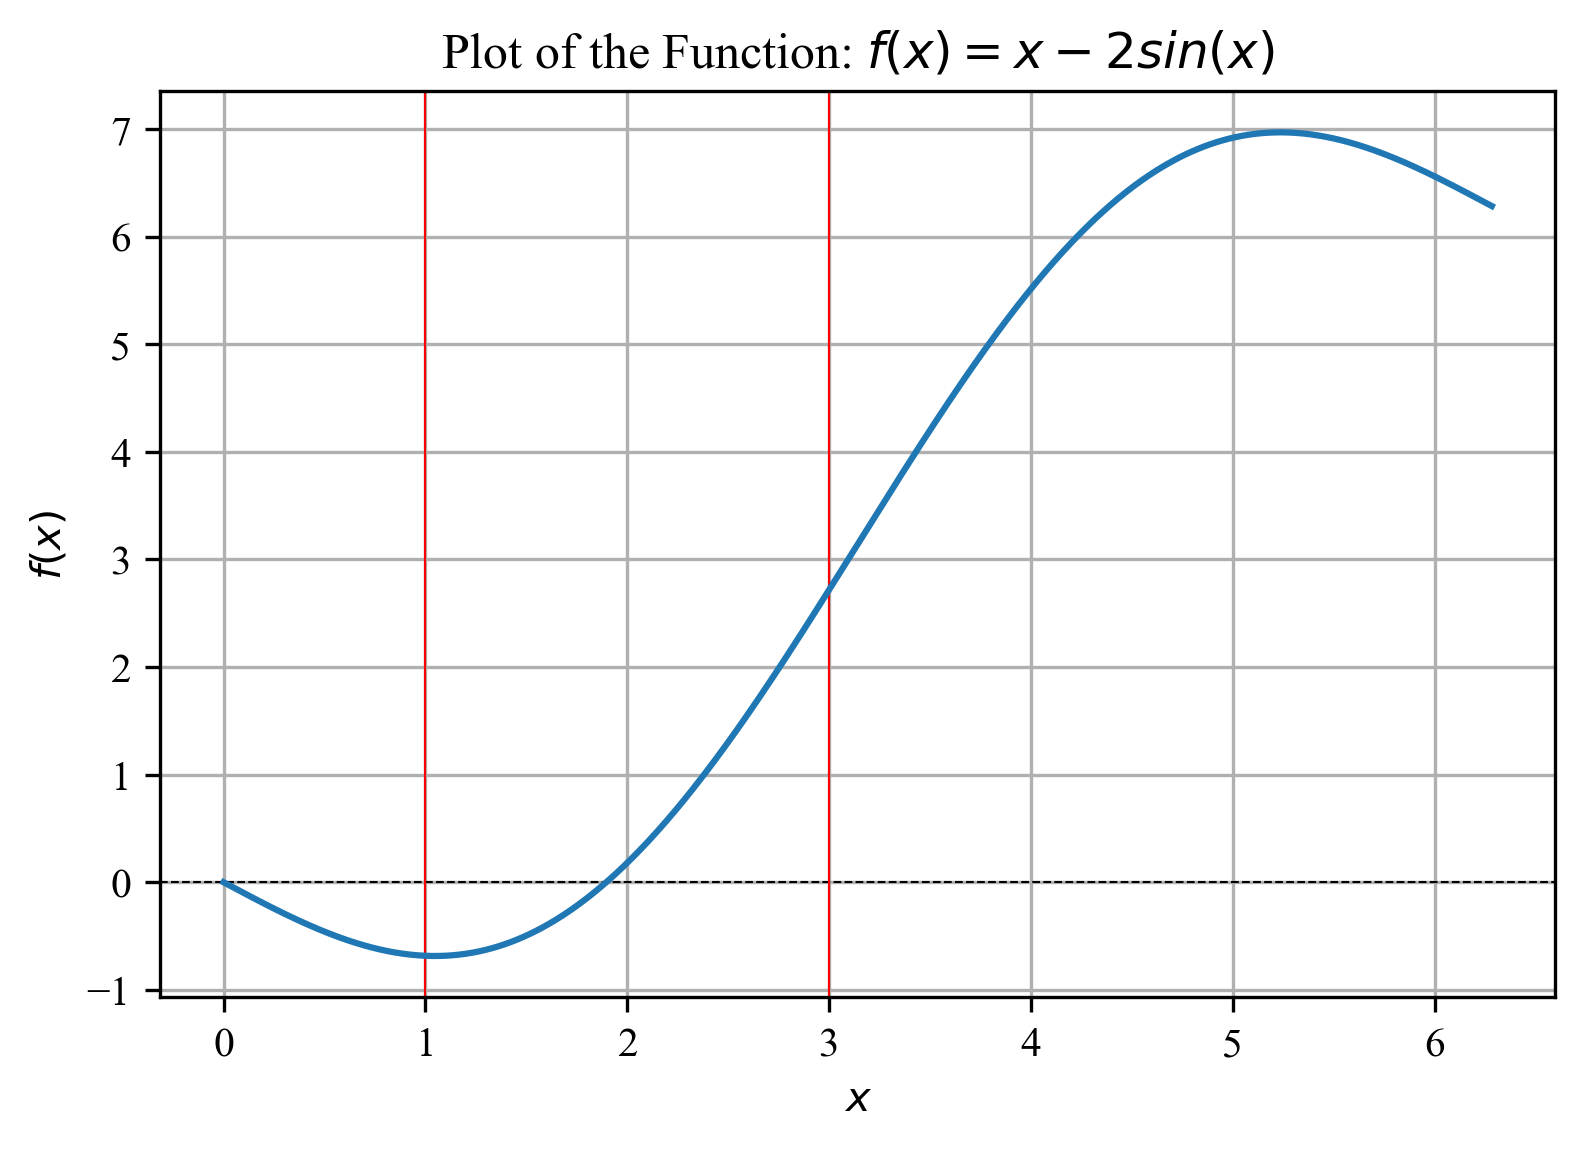

In [13]:
# Defining the function
def f(x):
    return x - 2*np.sin(x)

# Generating x values
x_values = np.linspace(0, 2 * np.pi, 1000)

# Computing function values
y_values = f(x_values)

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Plotting
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.axvline(x=1, color = 'r', linewidth=0.5)
plt.axvline(x=3, color = 'r', linewidth=0.5)
plt.plot(x_values, y_values)
plt.title('Plot of the Function: $f(x) = x - 2sin(x)$')
plt.grid()
plt.show()

Plotting the function $(x-2sinx)^2$ we see that it changes sign in the interval $[1,3]$, so it is possible to find a root of this equation using the bisection method. We can use this interval in our code for the bisection method.

In [14]:
# Defining the modified function
def f(x):
    return x - 2*np.sin(x)

# Bisection method to find the root within the specified interval [a, b]
def bisection_method(a, b, f, tol=1e-6, max_iterations=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method requires the function to change sign over the interval.")

    error_estimate = np.inf
    x_root = None
    iterations = 0

    while error_estimate > tol and iterations < max_iterations:
        c = (a + b) / 2
        error_estimate = np.abs(b - a) / 2
        if f(c) == 0:
            x_root = c
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iterations += 1

    if x_root is None:
        x_root = (a + b) / 2

    return x_root, error_estimate, iterations

# Given interval [a, b] where the function changes sign
a = 1.0
b = 3.0 

# Finding the root using the bisection method
root_bisection, error_estimate_bisection, iterations_bisection = bisection_method(a, b, f)

# Printing the root and error estimate using the bisection method
print(f"Root using Bisection Method: {root_bisection:.6f}")
print(f"Error Estimate using Bisection Method: {error_estimate_bisection:.6e} ")
print("Number of Iterations using Bisection Method:", iterations_bisection)

Root using Bisection Method: 1.895494
Error Estimate using Bisection Method: 9.536743e-07 
Number of Iterations using Bisection Method: 21


# Question 3.c

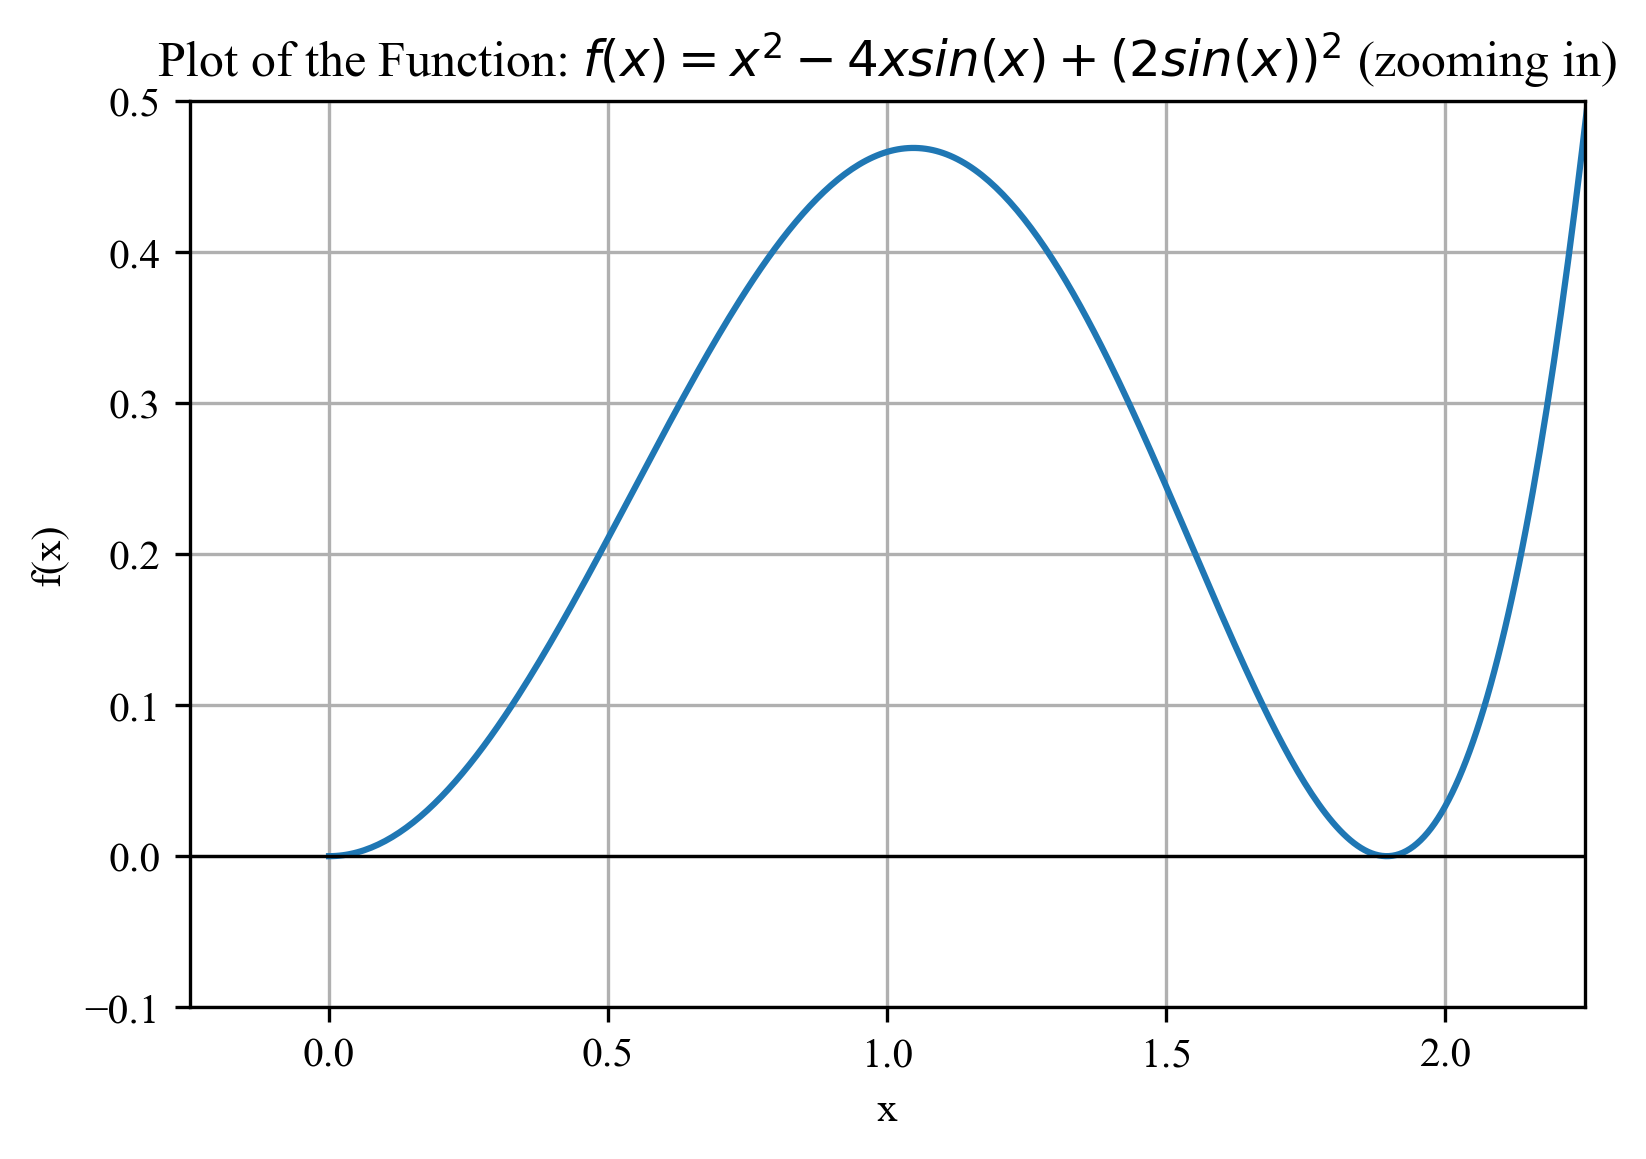

In [15]:
# Defining the function
def f(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

# Generating x values
x_values = np.linspace(0, 2 * np.pi, 1000)

# Computing function values
y_values = f(x_values)
plt.plot(x_values, y_values)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-0.25,2.25)
plt.ylim(-0.1,0.5)
plt.title('Plot of the Function: $f(x) = x^2 - 4xsin(x) + (2sin(x))^2$ (zooming in)')
plt.grid()
plt.show()


In [16]:
# Defining the function and its derivative
def f(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

def dfdx(x):
    return 2*x -4*x*np.cos(x) -4*np.sin(x) + 8*np.sin(x)*np.cos(x)

# Newton-Raphson method
def newton_raphson(f, dfdx, x0, n):
    x = x0
    for i in range(n):
        x = x - f(x) / dfdx(x)
    return x

x0 = 2 #initial guess
n = 5 #number of iterations
n1 = 10 
n2 = 100
n3 = 1000
root = newton_raphson(f, dfdx, x0, n)
root1 = newton_raphson(f, dfdx, x0, n1)
root2 = newton_raphson(f, dfdx, x0, n2)
root3 = newton_raphson(f, dfdx, x0, n3)
print(f"The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately {root:.6f} after {n} iterations.")
print(f"The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately {root1:.6f} after {n1} iterations.")
print(f"The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately {root2:.6f} after {n2} iterations.")
print(f"The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately {root3:.6f} after {n3} iterations.")

The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately 1.899134 after 5 iterations.
The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately 1.895608 after 10 iterations.
The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately 1.895494 after 100 iterations.
The root of the equation f(x) = x^4 - 3x^2 - 2 is approximately 1.895494 after 1000 iterations.


Apart from the trivial solution of $x=0$, we find another root of the equation as $x=1.8955$. This was done by looking at the plot and finding an initial guess value very close to the point where the function touches the x axis. We write the code a little differently to better understand the error estimation part:

In [17]:
# Newton-Raphson method with error estimation
def newton_raphson_with_error(f, dfdx, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / dfdx(x)
        absolute_error = abs(x_new - x)
        
        if absolute_error < tol:
            return x_new, absolute_error, i + 1  # Root found
        
        x = x_new

    raise ValueError("Newton-Raphson did not converge within the specified number of iterations.")

x0 = 2  # Initial guess
tolerance = 1e-6
max_iterations = 1000

root, error, iterations = newton_raphson_with_error(f, dfdx, x0, tol=tolerance, max_iter=max_iterations)

print(f"The root of the equation is approximately {root:.6f} after {iterations} iterations.")
print(f"Estimated absolute error: {error:.6e}")


The root of the equation is approximately 1.895495 after 17 iterations.
Estimated absolute error: 8.922565e-07


In [18]:
# Defining the function and its derivative
def f(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

def dfdx(x):
    return 2*x - 4*x*np.cos(x) - 4*np.sin(x) + 8*np.sin(x)*np.cos(x)

# Newton-Raphson method with error estimation
def newton_raphson_with_error(f, dfdx, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / dfdx(x)
        absolute_error = abs(x_new - x)
        
        if absolute_error < tol:
            return x_new, absolute_error, i + 1  # Root found
        
        x = x_new

        # Estimate error using the formula
        error_estimate = abs(dfdx(x_new)) * absolute_error**2
        
        if error_estimate < tol:
            return x_new, error_estimate, i + 1  # Root found

    raise ValueError("Newton-Raphson did not converge within the specified number of iterations.")

x0 = 2  # Initial guess
tolerance = 1e-6
max_iterations = 100

root, error, iterations = newton_raphson_with_error(f, dfdx, x0, tol=tolerance, max_iter=max_iterations)

print(f"The root of the equation is approximately {root:.6f} after {iterations} iterations.")
print(f"Estimated error using the formula: {error:.6e}")


The root of the equation is approximately 1.899134 after 5 iterations.
Estimated error using the formula: 2.560425e-07


I was a little confused about the error formula for NR method so I have tried it both ways. Clearly, the first way takes us closer to the real value of the root but has a higher error.

We see that the root values obtained from both the Bisection and the Newton-Raphson method agree which indicated that out solution is correct. Graphically also we can see that the root is around the value of 1.895